# **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

In [32]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage import io 
from skimage.transform import rescale

import warnings
warnings.filterwarnings("ignore")

Pretty printing has been turned ON


## 5.1 Morphological operations 

**Q.1** Using morphological operations functions build in skimage [`morphology module`](http://scikit-image.org/docs/dev/api/skimage.morphology.html) and structuring element of [`disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) apply **erosion, dilation, opening and closing** morphological operations on `FindingContours.png` image, using disk ratio of $r \in [1, 10, 20]$

**Note** use io.imshow to show the image rather than plt.

** Q.1.1 Erosion**

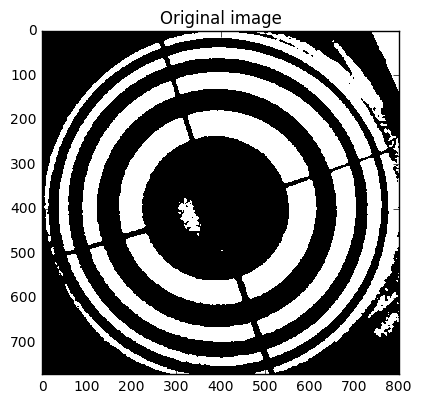

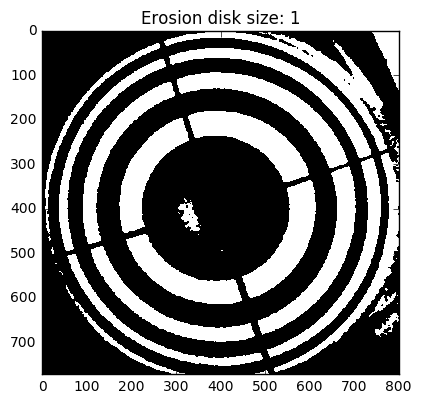

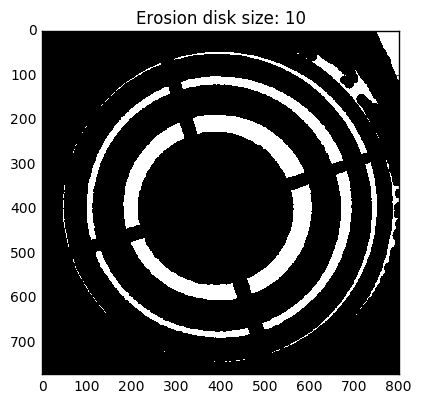

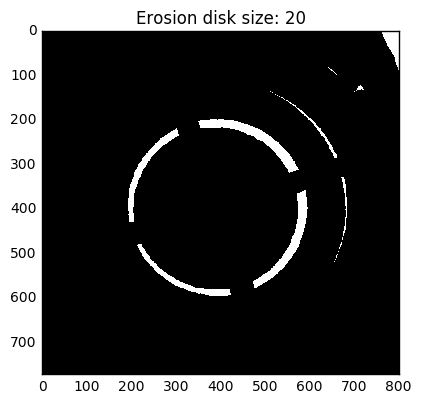

In [33]:
from skimage import morphology
im = img_as_ubyte(io.imread('./images/FindingContours.png',as_grey=True))
io.imshow(im)
plt.title('Original image')
disk_sizes = [1,10,20]

for r in disk_sizes:
    selem = morphology.disk(r)

    x = morphology.erosion(im,selem)
    plt.figure()
    io.imshow(x)
    plt.title('Erosion disk size: '+str(r))
    plt.show()



** Q.1.2 Dilation **

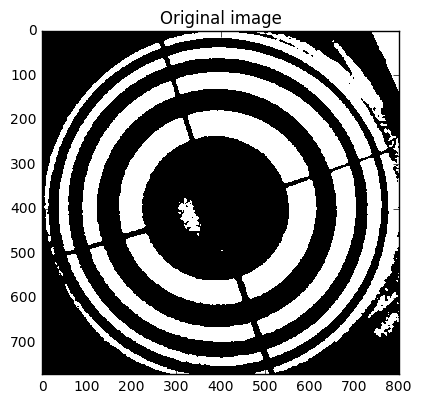

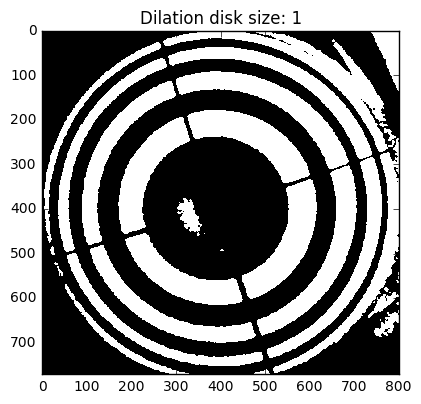

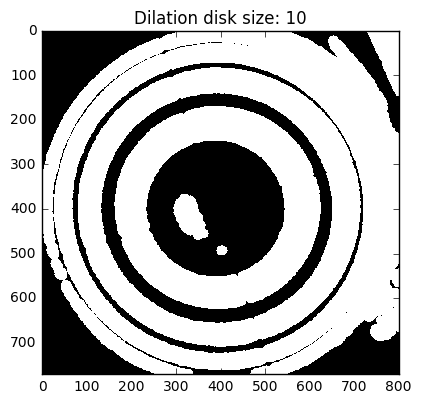

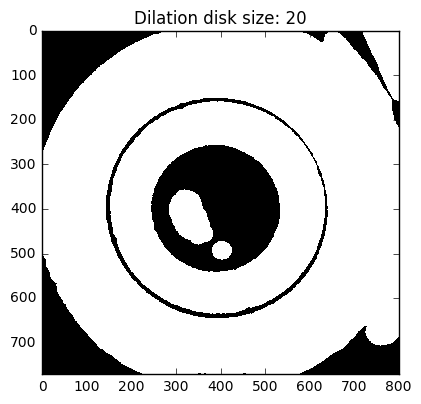

In [5]:
from skimage import morphology
im = img_as_ubyte(io.imread('./images/FindingContours.png',as_grey=True))
io.imshow(im)
plt.title('Original image')
disk_sizes = [1,10,20]

for r in disk_sizes:
    selem = morphology.disk(r)

    x = morphology.dilation(im,selem)
    plt.figure()
    io.imshow(x)
    plt.title('Dilation disk size: '+str(r))
    plt.show()



** Q.1.3 Opening **

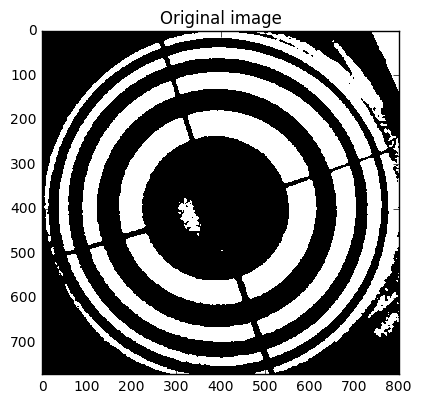

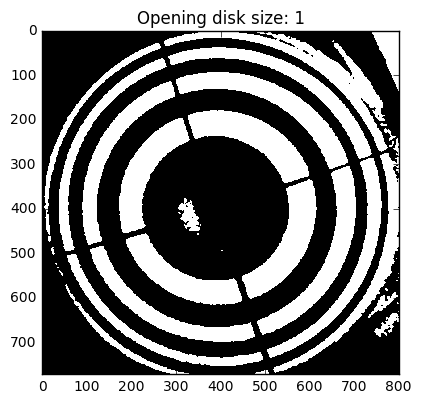

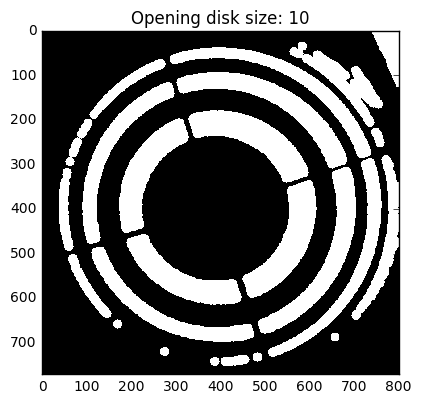

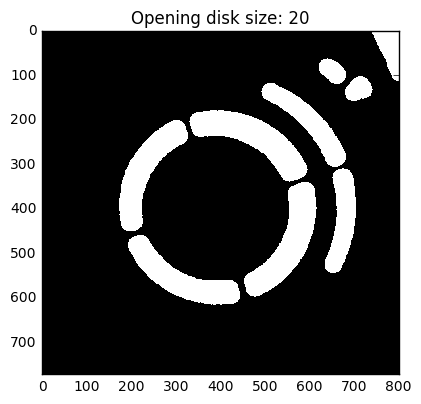

In [6]:
from skimage import morphology
im = img_as_ubyte(io.imread('./images/FindingContours.png',as_grey=True))
io.imshow(im)
plt.title('Original image')
disk_sizes = [1,10,20]

for r in disk_sizes:
    selem = morphology.disk(r)

    x = morphology.opening(im,selem)
    plt.figure()
    io.imshow(x)
    plt.title('Opening disk size: '+str(r))
    plt.show()



** Q.1.4 Closing**

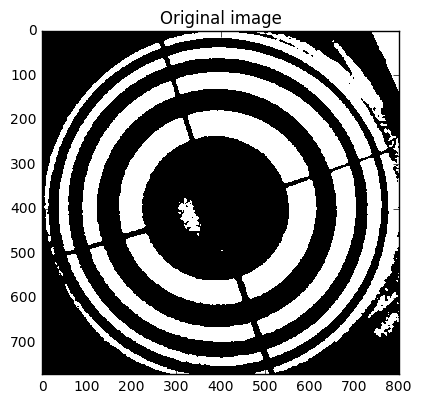

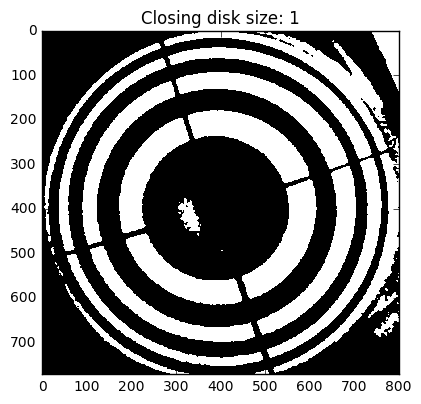

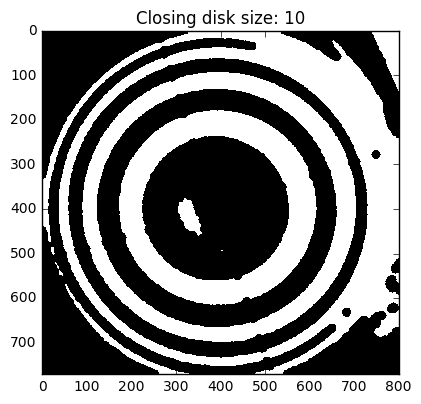

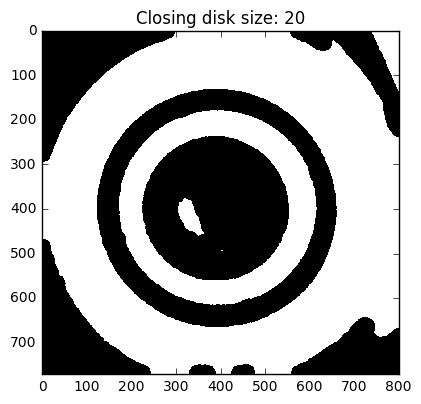

In [7]:
from skimage import morphology
im = img_as_ubyte(io.imread('./images/FindingContours.png',as_grey=True))
io.imshow(im)
plt.title('Original image')
disk_sizes = [1,10,20]

for r in disk_sizes:
    selem = morphology.disk(r)

    x = morphology.closing(im,selem)
    plt.figure()
    io.imshow(x)
    plt.title('Closing disk size: '+str(r))
    plt.show()



** Q.2 ** Explain what is the difference between erosion, dilation, opening and closing ? 

Erosion change a foreground pixel (usually white pixels) to background if all neighbors (4 or 8) are background.

Dilation change a background pixel to foreground if at least one foreground neighbor.

Opening and closing are operators derived from the fundamental operations of erosion and dilation:

- Opening is defined as an erosion followed by a dilation using the same structuring element for both operations.

- Closing is defined as a dilation followed by an erosion using the same structuring element for both operations.

Opening is used to eliminate small clumps of undesirable foreground pixels (like salt noise). Using only erosion this noise can be removed but it will affect all regions. Using also a dilation will make all regions not removed to come back to a similar shape as the beggining.

The same happens in the closing operation. Using only dilation can remove undesirable background pixels but it will affect all regions. Using also a erosion will restore regions to a similar shape.






## 5.2 segmentation

### 5.2.1  Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore: 

**1-** read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

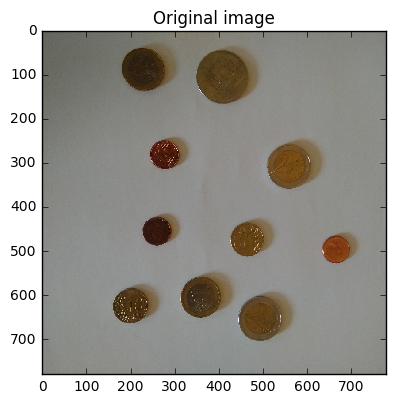

In [35]:
from skimage import morphology, filters
import numpy as np
im = rescale(img_as_ubyte(io.imread('./images/coins.jpg')),.25)
io.imshow(im)
plt.title('Original image')
plt.show()

**2-** Threshold the image using a global Otsu's thresholding (check `skimage.filters`) after converting the image into gray scale. Display the thresholded image.

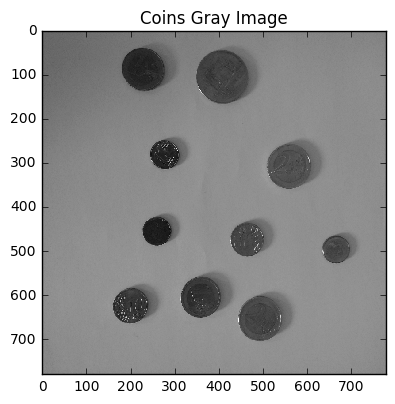

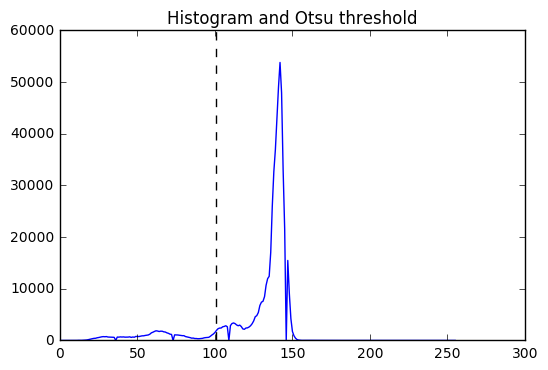

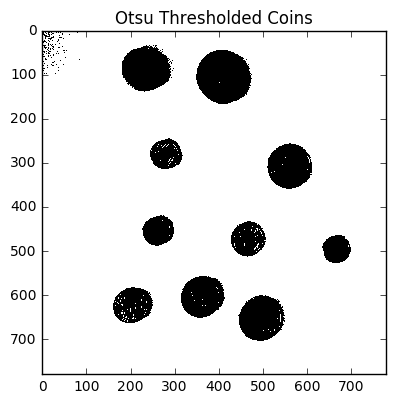

In [51]:
im_grey = img_as_ubyte(rgb2gray(im))

#Show Grey image
io.imshow(im_grey)
plt.title('Coins Gray Image')

#Compute Threshold
threshold_global_ostu = filters.threshold_otsu(im_grey)

#Show histogram & threshold
bins, bins_c = np.histogram(im_grey,256)

##Histogram
plt.figure()
plt.plot(bins)
plt.title('Histogram and Otsu threshold')

##Threshold
plt.axvline(x=threshold_global_ostu, color='k', linestyle='--')
plt.show()

#Threshold the image
binary = im_grey > threshold_global_ostu

#Show the result
plt.figure()
io.imshow(binary, cmap=plt.cm.gray)
plt.title('Otsu Thresholded Coins')
plt.show()



**3-** Clean the  thresholded image using some morphological operations, i.e. erosion, dilation, opening, closing ...

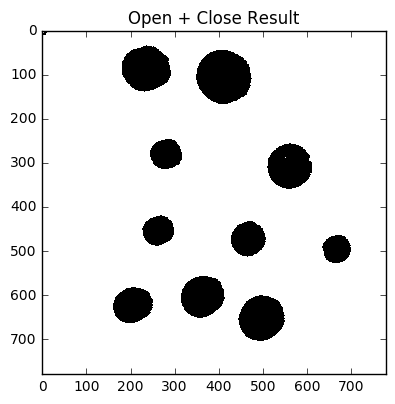

In [50]:
#I will use an open operation to remove salt noise and a close operation 
# to remove pepper noise, which is located in the top left corner. Due to
# pepper noise is very concentrated, I will use a bigger disk size to 
# remove it

from skimage import morphology

#Create disks
selem_open = morphology.disk(1)
selem_close = morphology.disk(3)

#Apply the operations
img_clean = morphology.opening(binary,selem_open)
img_clean = morphology.closing(img_clean,selem_close)

#Show the result
plt.figure()
io.imshow(img_clean)
plt.title('Open + Close Result')
plt.show()


**4-** Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image using `circle_perimeter` from `skimage.draw`


The number of regions found is: 12
number of regions after filtering noise by diameter size: 10


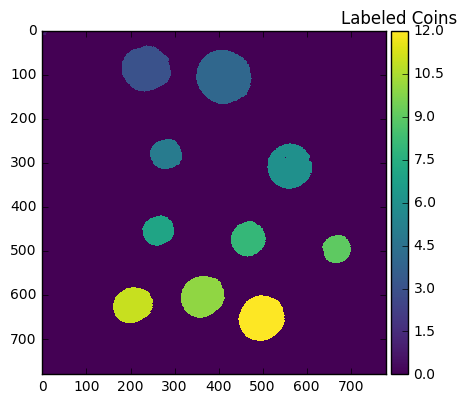

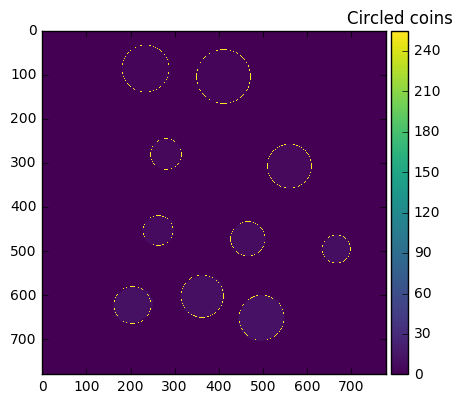

In [72]:
from skimage import measure
from skimage.draw import circle_perimeter

img_label = measure.label(img_clean, background = True)

regions = measure.regionprops(img_label)
io.imshow(img_label)
plt.title('Labeled Coins') # For some reason title appears in the top right
print('The number of regions found is: {}'.format(len(regions)))

n_reg = 0
for idx,region in enumerate(regions):
    if idx != 0:
        rad = region.equivalent_diameter /2
        #Filter radius size to avoid noise detection
        if rad > 5:
            circle_coord = circle_perimeter(int(region.centroid[0]), int(region.centroid[1]),int(rad))
            img_label[circle_coord[0],circle_coord[1]] = 255
            n_reg +=1

print("number of regions after filtering noise by diameter size: "+str(n_reg))

plt.figure()
io.imshow(img_label)

plt.title('Circled coins')
plt.show()
                                        

### 5.2.2 Segmentation of markers

**Q.3** Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

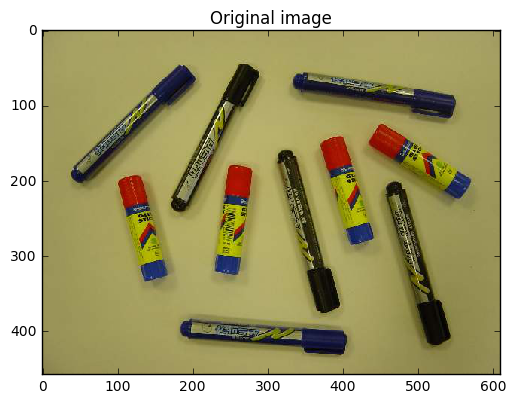

In [167]:
from skimage import morphology, filters
import numpy as np
im_objets = rescale(img_as_ubyte(io.imread('./images/objets4.jpg')),1)
io.imshow(im_objets)
plt.title('Original image')
plt.show()


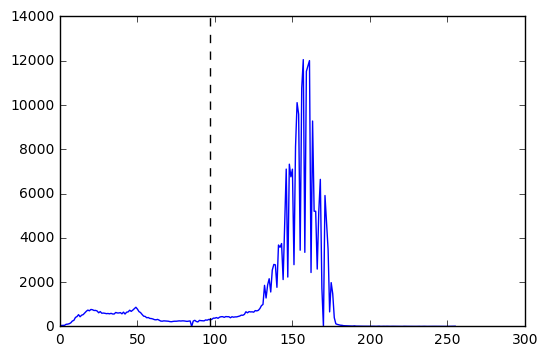

97


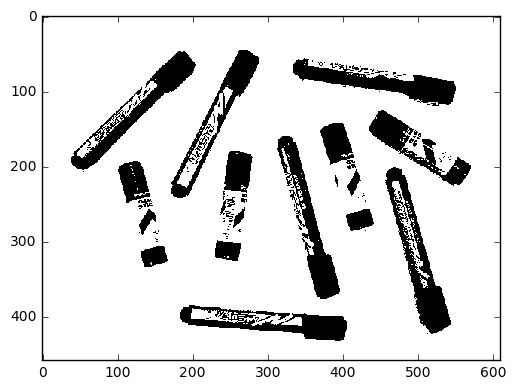

In [168]:
im_grey = img_as_ubyte(rgb2gray(im_objets))

bins, bins_c = np.histogram(im_grey,256)

plt.figure()
plt.plot(bins)

threshold_global_ostu = filters.threshold_otsu(im_grey)

#Show threshold
plt.axvline(x=threshold_global_ostu, color='k', linestyle='--')
plt.show()

print(threshold_global_ostu)
binary = im_grey > threshold_global_ostu

plt.figure()
io.imshow(binary, cmap=plt.cm.gray)
plt.show()


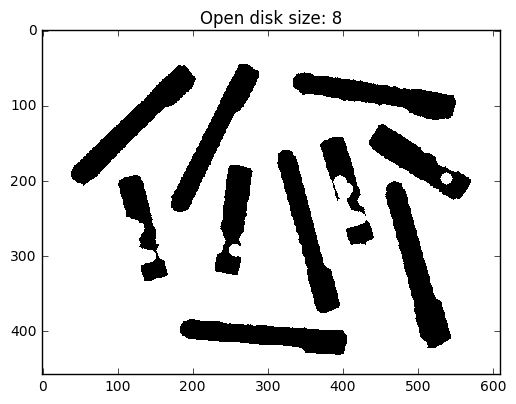

In [170]:
from skimage import morphology

#I will use an open operation to remove salt noise I will use a big
#disk size to remove as much white inside the objects as possible.

selem = morphology.disk(8)
#img_morph = morphology.closing(binary,selem)
img_morph = morphology.opening(binary,selem)

plt.figure()
io.imshow(img_morph)
plt.title('Open disk size: '+str(r))
plt.show()


Number of pens = 6
Number of glue = 4


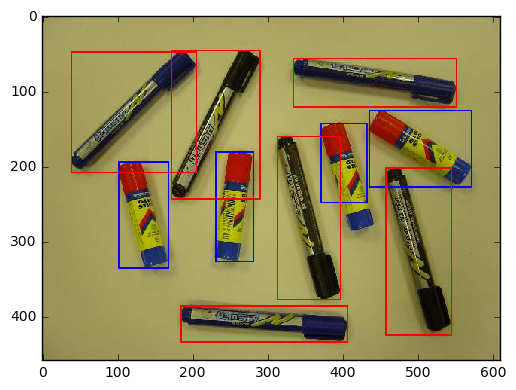

In [171]:
from skimage import measure
from skimage.draw import polygon_perimeter

#Find regions
im_objets_labels = measure.label(img_morph,background = True)
im_objets_props = measure.regionprops(im_objets_labels)

#Create an image where I will show the results
im_detection = img_as_ubyte(im_objets)

#Initialize counters
num_pens_found = 0
num_glue_found = 0

for label_prop in im_objets_props:
    #Filter smaller objects and not correctly joined parts by area
    if(label_prop.area > 1000): 
        if(label_prop.eccentricity > 0.98): #Pens have a big eccentricity of around 0.99+
            num_pens_found += 1
            
            #Obtain bounding box
            min_row, min_col, max_row, max_col = label_prop.bbox
            #Print bounding box red
            rr, cc = polygon_perimeter([min_row, min_row,max_row, max_row],[min_col,max_col,max_col,min_col],shape=im_detection.shape)
            im_detection[rr,cc] = (255,0,0) #I print several times because jupyter-notebook doesn't show bounding box well (but looks good when saved)
            im_detection[rr+1,cc] = (255,0,0)
            im_detection[rr,cc+1] = (255,0,0)
            im_detection[rr+1,cc+1] = (255,0,0)
        else: #Other objects are considered to be glue
            num_glue_found += 1
            #Obtain bounding box
            min_row, min_col, max_row, max_col = label_prop.bbox
            #Print bounding box blue
            rr, cc = polygon_perimeter([min_row, min_row,max_row, max_row],[min_col,max_col,max_col,min_col],shape=im_detection.shape)
            im_detection[rr,cc] = (0,0,255) #I print several times because jupyter-notebook doesn't show bounding box well (but looks good when saved)
            im_detection[rr+1,cc] = (0,0,255)
            im_detection[rr,cc+1] = (0,0,255)
            im_detection[rr+1,cc+1] = (0,0,255)

print("Number of pens = " + str(num_pens_found))
print("Number of glue = "+ str(num_glue_found))

plt.figure()
io.imshow(im_detection)

io.imsave('images/detected.jpg',im_detection)